c:\Users\assad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
291/291 - 13s - 45ms/step - accuracy: 0.3752 - loss: 2.5377 - val_accuracy: 0.7063 - val_loss: 1.4900 - learning_rate: 0.0010
Epoch 2/50
291/291 - 6s - 20ms/step - accuracy: 0.7268 - loss: 1.1129 - val_accuracy: 0.8713 - val_loss: 0.6135 - learning_rate: 0.0010
Epoch 3/50
291/291 - 10s - 36ms/step - accuracy: 0.8036 - loss: 0.8355 - val_accuracy: 0.8917 - val_loss: 0.5180 - learning_rate: 0.0010
Epoch 4/50
291/291 - 6s - 19ms/step - accuracy: 0.8399 - loss: 0.6997 - val_accuracy: 0.9023 - val_loss: 0.4584 - learning_rate: 0.0010
Epoch 5/50
291/291 - 6s - 20ms/step - accuracy: 0.8582 - loss: 0.6147 - val_accuracy: 0.9054 - val_loss: 0.4201 - learning_rate: 0.0010
Epoch 6/50
291/291 - 6s - 21ms/step - accuracy: 0.8676 - loss: 0.5524 - val_accuracy: 0.9139 - val_loss: 0.3890 - learning_rate: 0.0010
Epoch 7/50
291/291 - 10s - 34ms/step - accuracy: 0.8762 - loss: 0.5204 - val_accuracy: 0.9166 - val_loss: 0.3724 - learning_rate: 0.0010
Epoch 8/50
291/291 - 6s - 20ms/step - accurac


✅ Test Accuracy: 94.83%
🧠 Test Loss: 0.2151
💾 Model saved as signify_anti_overfit_model.h5


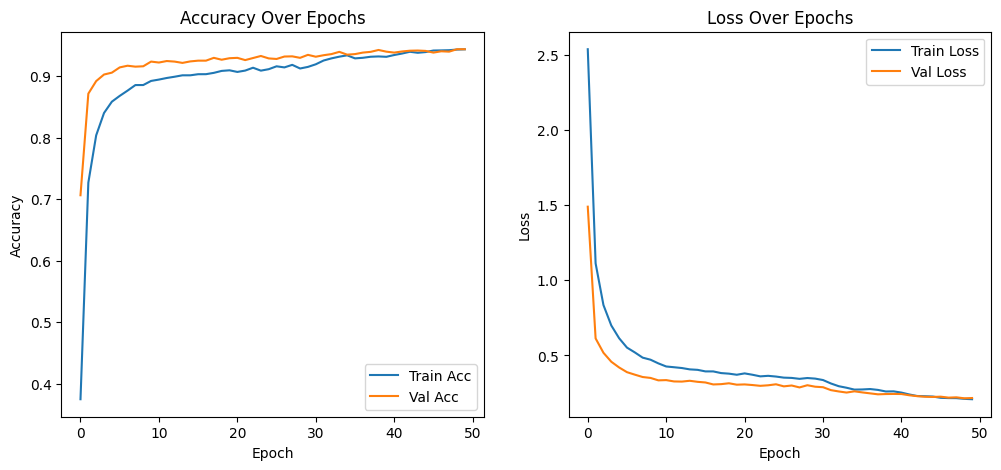

In [2]:
# ======================================================
# Signify: Urdu Sign Language Recognition (Anti-Overfitting CNN)
# ======================================================
# Author: Assadullah Raza
# Dataset: 27,000 samples | 37 classes | 21 keypoints (x, y, z)
# ======================================================

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import regularizers

# ------------------------------------------
# Step 1: Load and Prepare Data
# ------------------------------------------
csv_path = "augmented hand_keypoints.csv"
data = pd.read_csv(csv_path)

# Split features & labels
X = data.drop('label', axis=1).values
y = data['label'].values

# Encode class labels (A->0, B->1, etc.)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Standardize input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape to (samples, 21, 3)
X = X.reshape(-1, 21, 3)

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------------------
# Step 2: Define Improved CNN Model
# ------------------------------------------
model = keras.Sequential([
    keras.layers.Conv1D(64, 3, activation='relu', input_shape=(21, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Conv1D(128, 3, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Dropout(0.3),

    keras.layers.Conv1D(256, 3, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Dropout(0.4),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu',
                       kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(37, activation='softmax')
])

# ------------------------------------------
# Step 3: Compile Model
# ------------------------------------------
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ------------------------------------------
# Step 4: Define Callbacks (to prevent overfitting)
# ------------------------------------------
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-5
)

# ------------------------------------------
# Step 5: Train Model
# ------------------------------------------
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.15,
    callbacks=[early_stop, reduce_lr],
    verbose=2
)

# ------------------------------------------
# Step 6: Evaluate Model
# ------------------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"🧠 Test Loss: {test_loss:.4f}")

# ------------------------------------------
# Step 7: Save Model
# ------------------------------------------
model.save("signify_anti_overfit_model.h5")
print("💾 Model saved as signify_anti_overfit_model.h5")

# ------------------------------------------
# Step 8: Plot Training Performance
# ------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()

plt.show()


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

🔹 Overall Model Performance 🔹
Accuracy : 0.9483
Precision: 0.9495
Recall   : 0.9483
F1 Score : 0.9486


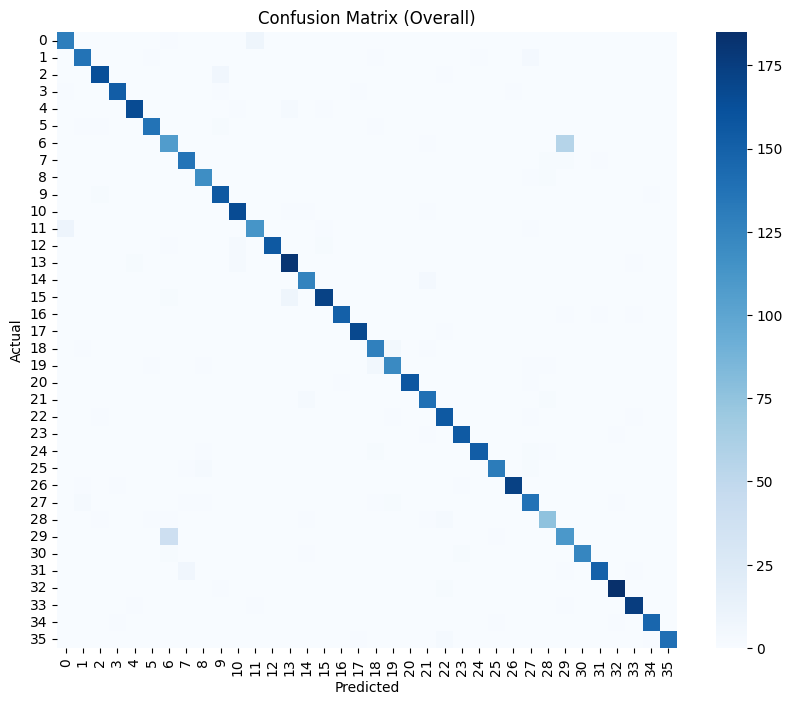

NameError: name 'label_encoder' is not defined

In [4]:
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Model Evaluation on Test Data
# -----------------------------
# Predict classes
y_pred = np.argmax(model.predict(X_test), axis=1)

# Overall performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("\n🔹 Overall Model Performance 🔹")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

# -----------------------------
# Confusion Matrix Visualization
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix (Overall)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# Save Scaler and Label Encoder
# -----------------------------
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
print("\n✅ Scaler and Label Encoder saved successfully.")
